In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Dataset

In [2]:
df1 = pd.read_csv("data/scenario1_baseline.csv")
df2 = pd.read_csv("data/scenario2_malicious.csv")

In [3]:
df1

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,189.40,0.0,0.0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,145.70,0.0,0.0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,144.90,0.0,0.0
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,0,0.0,0,0,0.0,0.0,0.0,194.24,0.0,0.0
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,143.20,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,OV_2,MAIN_2,7087,29.529,7082,5,0,0,5,...,0,0.0,0,0,0.0,0.0,0.0,141.74,0.0,0.0
146,48,OV_3,MAIN_3,7305,30.438,7291,14,0,0,14,...,0,0.0,0,0,0.0,0.0,0.0,146.10,0.0,0.0
147,49,OV_1,MAIN_1,9604,40.017,9589,15,0,0,15,...,0,0.0,0,0,0.0,0.0,0.0,192.08,0.0,0.0
148,49,OV_2,MAIN_2,7356,30.650,7356,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,147.12,0.0,0.0


In [4]:
df2

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.000000,473.50,0.0,0.000000
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.000000,364.25,0.0,0.000000
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.000000,362.25,0.0,0.000000
3,1,OV_1,MAIN_1,9712,40.467,7577,0,2135,0,2135,...,2368,7.104,2637,2135,100.0,2367.76,0.000000,485.60,0.0,2367.760000
4,1,OV_2,MAIN_2,7160,29.833,7132,27,1,0,28,...,0,0.000,0,0,0.0,0.00,0.000000,358.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,48,OV_2,MAIN_2,7755,32.312,7747,8,0,0,8,...,0,0.000,0,0,0.0,0.00,0.000000,387.75,0.0,0.000000
146,48,OV_3,MAIN_3,7613,31.721,7596,17,0,0,17,...,0,0.000,0,0,0.0,0.00,0.000000,380.65,0.0,0.000000
147,49,OV_1,MAIN_1,8697,36.237,8683,14,0,0,14,...,20,0.060,0,0,0.0,0.00,2.755554,434.85,23.0,20.244423
148,49,OV_2,MAIN_2,7583,31.596,7583,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.000000,379.15,0.0,0.000000


### Check

In [5]:
# 2) Normalizzazione nomi colonne
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df1 = clean_columns(df1)
df2 = clean_columns(df2)

In [6]:
df1.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg'],
      dtype='object')

In [7]:
df2.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg'],
      dtype='object')

In [8]:
df1.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

In [9]:
df2.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

### New features

In [10]:
# df1
df1["ok_rate"] = df1["ok"] / df1["assigned_slots"]
df1["scenario"] = 1
df1["assigned_share"] = df1["assigned_slots"] / 24000

In [11]:
# df2
df2["ok_rate"] = df2["ok"] / df2["assigned_slots"]
df2["scenario"] = 2
df2["assigned_share"] = df2["assigned_slots"] / 24000

df2["malicious_i"] = (df2["overflow"] == "OV_1").astype(int)
df2["post_t"] = (df2["epoch"] >= 50).astype(int)
df2["interaction"] = df2["malicious_i"] * df2["post_t"]

df2["time_since_switch"] = np.where(df2["epoch"] >= 50, df2["epoch"] - 50, 0)

### Panel and check

In [12]:
# 4) Concatenazione opzionale
panel = pd.concat([df1, df2], ignore_index=True)

In [13]:
panel

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,189.40,0.0,0.000000,1.000000,1,0.394583,NaN,NaN,NaN,NaN
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,145.70,0.0,0.000000,1.000000,1,0.303542,NaN,NaN,NaN,NaN
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,144.90,0.0,0.000000,1.000000,1,0.301875,NaN,NaN,NaN,NaN
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,194.24,0.0,0.000000,0.995572,1,0.404667,NaN,NaN,NaN,NaN
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,143.20,0.0,0.000000,1.000000,1,0.298333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,48,OV_2,MAIN_2,7755,32.312,7747,8,0,0,8,...,387.75,0.0,0.000000,0.998968,2,0.323125,0.0,0.0,0.0,0.0
296,48,OV_3,MAIN_3,7613,31.721,7596,17,0,0,17,...,380.65,0.0,0.000000,0.997767,2,0.317208,0.0,0.0,0.0,0.0
297,49,OV_1,MAIN_1,8697,36.237,8683,14,0,0,14,...,434.85,23.0,20.244423,0.998390,2,0.362375,1.0,0.0,0.0,0.0
298,49,OV_2,MAIN_2,7583,31.596,7583,0,0,0,0,...,379.15,0.0,0.000000,1.000000,2,0.315958,0.0,0.0,0.0,0.0


In [14]:
panel.shape

(300, 38)

In [15]:
panel.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg', 'ok_rate', 'scenario',
       'assigned_share', 'malicious_i', 'post_t', 'interaction',
       'time_since_switch'],
      dtype='object')

In [16]:
panel.head()

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,189.40,0.0,0.0,1.000000,1,0.394583,NaN,NaN,NaN,NaN
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,145.70,0.0,0.0,1.000000,1,0.303542,NaN,NaN,NaN,NaN
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,144.90,0.0,0.0,1.000000,1,0.301875,NaN,NaN,NaN,NaN
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,194.24,0.0,0.0,0.995572,1,0.404667,NaN,NaN,NaN,NaN
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,143.20,0.0,0.0,1.000000,1,0.298333,NaN,NaN,NaN,NaN


In [17]:
# 6) Controlla NaN e valori anomali
panel.isna().sum()

epoch                                    0
overflow                                 0
main                                     0
assigned_slots                           0
share_assigned_slots                     0
ok                                       0
skipped                                  0
invalid                                  0
delayed                                  0
bad_slots_abs                            0
bad_slots_pct_node                       0
effective_stake                          0
stake_share_pct                          0
effective_stake_next                     0
stake_share_next_pct                     0
delivered_slots_share_pct                0
coinbase_epoch_tkg                       0
fees_epoch_tkr_at_main                   0
reward_epoch_total_value_tkg_only        0
coinbase_cum_tkg                         0
fees_cum_tkr_at_main                     0
penalty_slots_residual                   0
penalty_score                            0
forced_inva

In [18]:
df1.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [19]:
df2.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [20]:
df1.to_csv("dataset/scenario1.csv", index=False)
df2.to_csv("dataset/scenario2.csv", index=False)
panel.to_csv("dataset/panel.csv", index=False)

### Sanity checks

In [21]:
pd.set_option("display.max_columns", None)  # mostra tutte le colonne
pd.set_option("display.width", 0)           # evita il troncamento orizzontale

In [22]:
df1.groupby("overflow").describe()

epoch                                                assigned_slots  \
         count  mean       std  min    25%   50%    75%   max          count   
overflow                                                                       
OV_1      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   
OV_2      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   
OV_3      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   

                                                                        \
             mean        std     min      25%     50%      75%     max   
overflow                                                                 
OV_1      9612.70  71.429786  9451.0  9570.25  9605.0  9683.75  9760.0   
OV_2      7203.36  79.395615  7070.0  7135.50  7200.5  7275.75  7356.0   
OV_3      7183.94  73.855736  7040.0  7132.00  7186.0  7237.75  7356.0   

         share_assigned_slots                                                 \
                        count      mean       std     min       25%      50%   
overflow                                                                       
OV_1                     50.0  40.05302  0.297685  39.379  39.87600  40.0210   
OV_2                     50.0  30.01392  0.330757  29.458  29.73125  30.0020   
OV_3                     50.0  29.93306  0.307767  29.333  29.71700  29.9415   

                              ok                                              \
               75%     max count     mean        std     min     25%     50%   
overflow                                                                       
OV_1      40.34875  40.667  50.0  9593.60  73.633123  9443.0  9544.5  9586.0   
OV_2      30.31575  30.650  50.0  7189.18  81.970052  7059.0  7116.5  7178.5   
OV_3      30.15700  30.650  50.0  7170.34  76.533735  7025.0  7110.0  7161.0   

                          skipped                                         \
              75%     max   count  mean        std  min  25%  50%    75%   
overflow                                                                   
OV_1      9668.50  9748.0    50.0  7.94  13.613334  0.0  0.0  0.0  12.50   
OV_2      7265.25  7356.0    50.0  5.76   8.049743  0.0  0.0  1.5   9.75   
OV_3      7221.50  7346.0    50.0  4.58   7.626725  0.0  0.0  0.0   8.75   

               invalid                                            delayed  \
           max   count  mean       std  min  25%  50%   75%   max   count   
overflow                                                                    
OV_1      61.0    50.0  2.84  5.273577  0.0  0.0  0.0  4.50  24.0    50.0   
OV_2      33.0    50.0  2.16  4.409452  0.0  0.0  0.0  2.00  19.0    50.0   
OV_3      35.0    50.0  2.48  4.272551  0.0  0.0  0.0  3.75  16.0    50.0   

                                                      bad_slots_abs         \
          mean        std  min  25%  50%    75%   max         count   mean   
overflow                                                                     
OV_1      8.32  12.581879  0.0  0.0  0.0  16.75  41.0          50.0  19.10   
OV_2      6.26  11.076377  0.0  0.0  0.5   7.75  48.0          50.0  14.18   
OV_3      6.54   7.551753  0.0  0.0  4.0  10.75  26.0          50.0  13.60   

                                                  bad_slots_pct_node          \
                std  min   25%   50%    75%   max              count    mean   
overflow                                                                       
OV_1      18.939485  0.0  5.25  12.5  27.25  65.0               50.0  0.1986   
OV_2      14.200733  0.0  2.25  11.0  19.00  53.0               50.0  0.1966   
OV_3      12.787111  0.0  4.25  11.0  15.00  51.0               50.0  0.1890   

                                                    effective_stake  \
               std  min     25%   50%     75%   max           count   
overflow                                                              
OV_1      0.198278  0.0  0.0525  0.13 

In [23]:
df2.groupby("overflow").describe()

epoch                                                assigned_slots  \
         count  mean       std  min    25%   50%    75%   max          count   
overflow                                                                       
OV_1      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   
OV_2      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   
OV_3      50.0  24.5  14.57738  0.0  12.25  24.5  36.75  49.0           50.0   

                                                                            \
             mean          std     min      25%     50%       75%      max   
overflow                                                                     
OV_1      5174.56  2835.441175  1398.0  2143.25  5365.5   7989.25   9712.0   
OV_2      9438.44  1428.913476  7160.0  8021.25  9381.0  10909.50  11441.0   
OV_3      9387.00  1410.761077  7128.0  7975.00  9253.5  10888.50  11213.0   

         share_assigned_slots                                                 \
                        count      mean        std     min      25%      50%   
overflow                                                                       
OV_1                     50.0  21.56068  11.814345   5.825   8.9300  22.3565   
OV_2                     50.0  39.32686   5.953869  29.833  33.4220  39.0880   
OV_3                     50.0  39.11256   5.878132  29.700  33.2295  38.5565   

                              ok                                         \
               75%     max count     mean          std     min      25%   
overflow                                                                  
OV_1      33.28875  40.467  50.0  5068.56  2846.148304  1141.0  2142.75   
OV_2      45.45625  47.671  50.0  9420.38  1428.829747  7132.0  8009.50   
OV_3      45.36925  46.721  50.0  9370.16  1407.883625  7128.0  7952.75   

                                    skipped                                  \
             50%       75%      max   count  mean        std  min  25%  50%   
overflow                                                                      
OV_1      5349.5   7691.00   9470.0    50.0  3.22   6.162063  0.0  0.0  0.0   
OV_2      9355.0  10899.25  11412.0    50.0  7.94  11.505828  0.0  0.0  1.5   
OV_3      9250.5  10874.00  11211.0    50.0  6.32   9.792625  0.0  0.0  0.0   

                      invalid                                                  \
            75%   max   count   mean         std  min  25%  50%   75%     max   
overflow                                                                        
OV_1       5.00  26.0    50.0  98.08  319.103389  0.0  0.0  0.0  8.75  2135.0   
OV_2      12.75  47.0    50.0   2.08    4.976844  0.0  0.0  0.0  0.75    28.0   
OV_3      10.00  42.0    50.0   2.96    5.517911  0.0  0.0  0.0  3.75    23.0   

         delayed                                              bad_slots_abs  \
           count  mean        std  min  25%  50%    75%   max         count   
overflow                                                                      
OV_1        50.0  4.70   9.383551  0.0  0.0  0.0   7.25  44.0          50.0   
OV_2        50.0  8.04  12.858667  0.0  0.0  0.0  15.00  52.0          50.0   
OV_3        50.0  7.56  10.228332  0.0  0.0  3.0  12.75  43.0          50.0   

                                                              \
            mean         std  min   25%   50%    75%     max   
overflow                                                       
OV_1      106.00  316.936484  0.0  3.25  12.5  37.75  2135.0   
OV_2       18.06   18.696731  0.0  4.00  13.0  28.00    74.0   
OV_3       16.84   16.203250  0.0  3.25  14.5  24.00    65.0   

         bad_slots_pct_node                                                \
                      count    mean       std  min     25%    50%     75%   
overflow                                                                    
OV_1                   50.0  3.9918  8.201259  0.0  0.1025  0.200  0.5175 

### DF1

In [24]:
df1 = df1.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_TKG_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 1)",
    "reward_epoch_total_value_TKG_only": "reward_total over time (Scenario 1)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 1)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 1)",
}

nodes = sorted(df1["node"].unique())
vline_epoch = 50  # linea verticale coerente con lo scenario 2 per confronto visuale

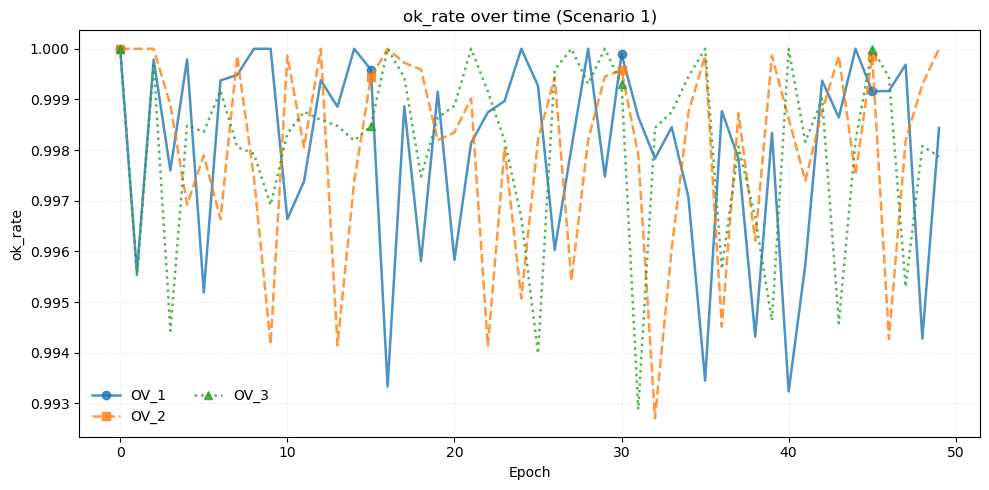

reward_epoch_total_value_TKG_only


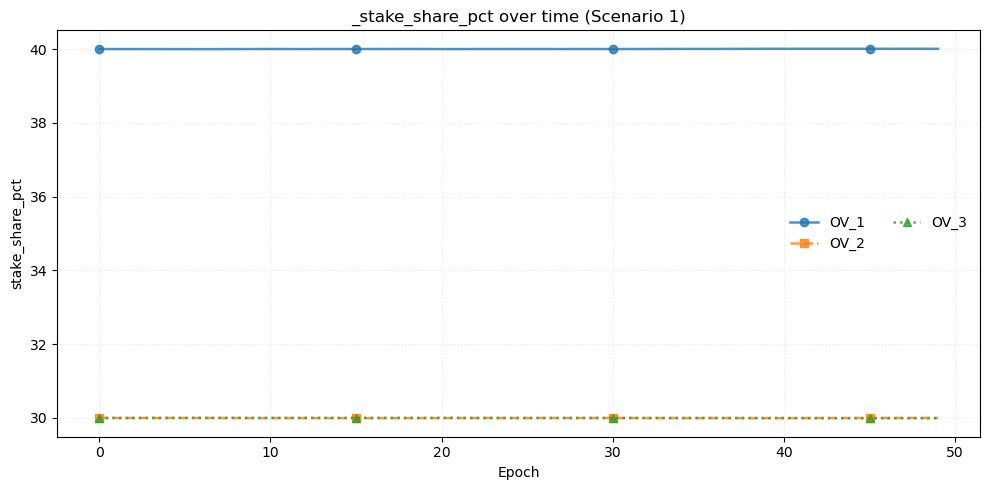

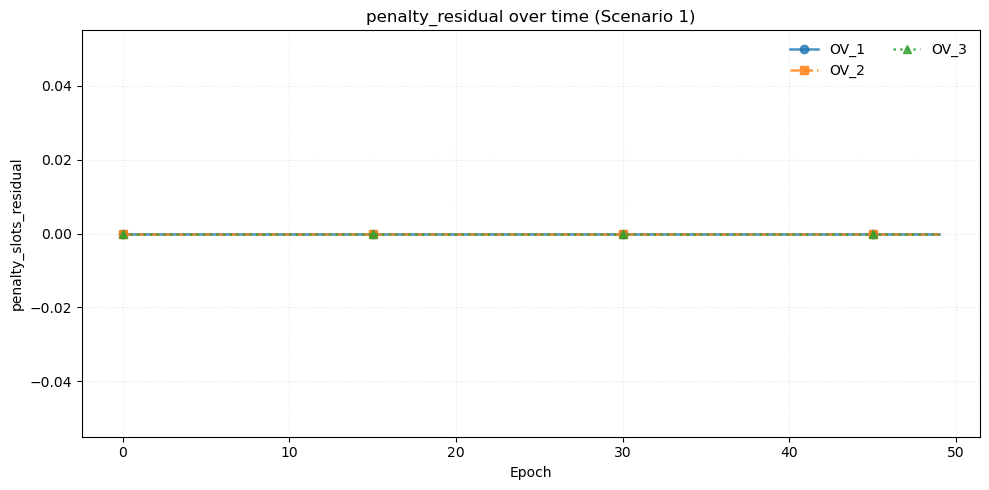

In [25]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df1.columns:
        print(var)
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df1[df1["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen1_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()


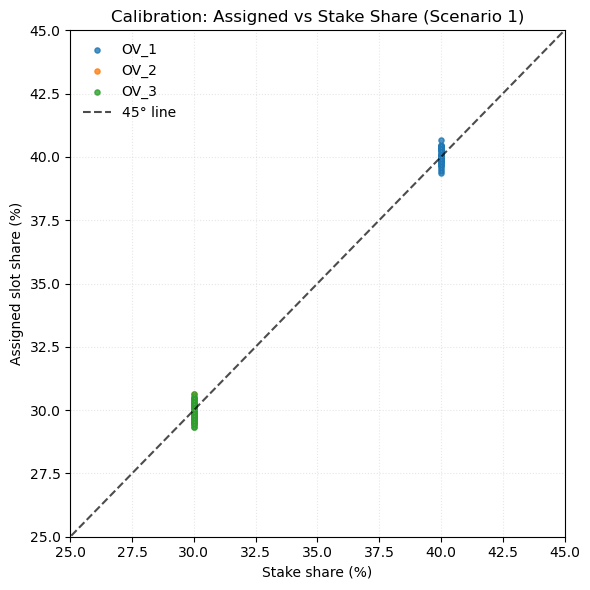

In [26]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df1["node"].unique():
    sub = df1[df1["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen1_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

### DF2

In [27]:
df2 = df2.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_TKG_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 2)",
    "reward_epoch_total_value_TKG_only": "reward_total over time (Scenario 2)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 2)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 2)",
}

nodes = sorted(df2["node"].unique())
vline_epoch = 10  # linea verticale coerente con lo scenario 2 per confronto visuale

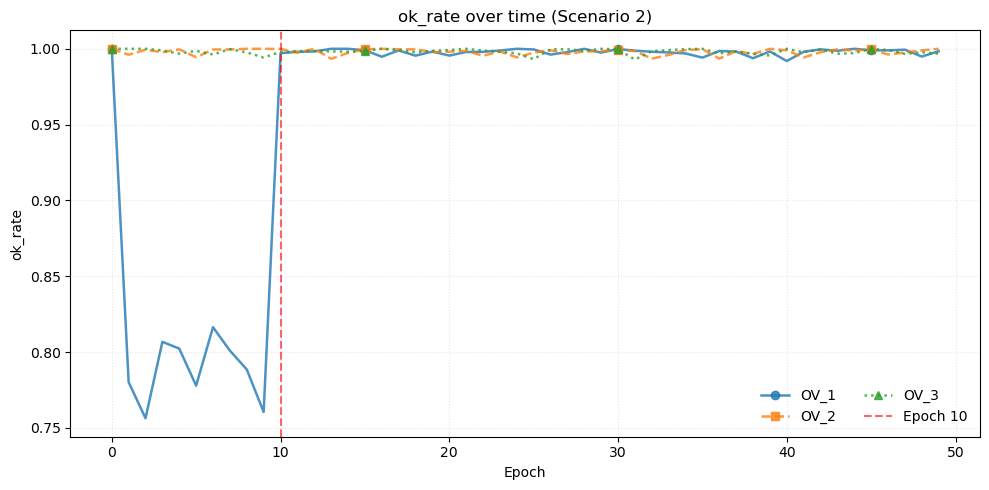

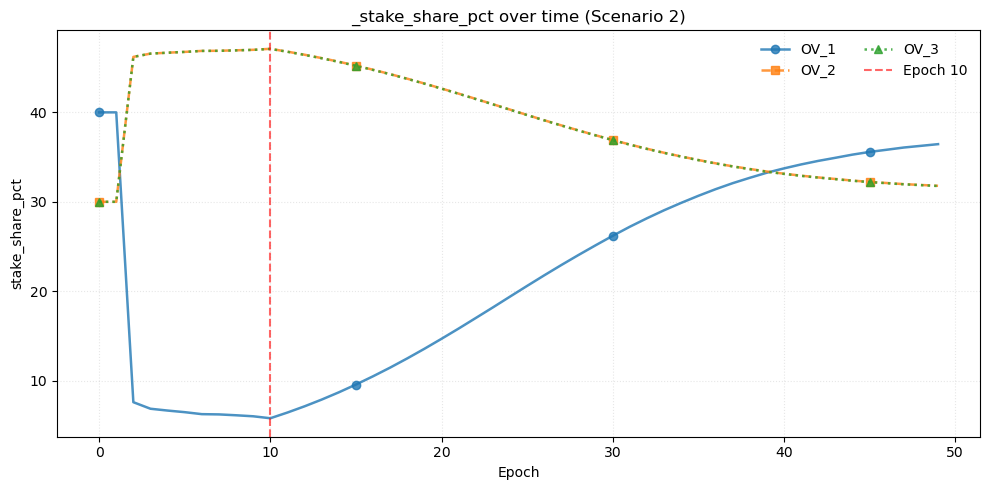

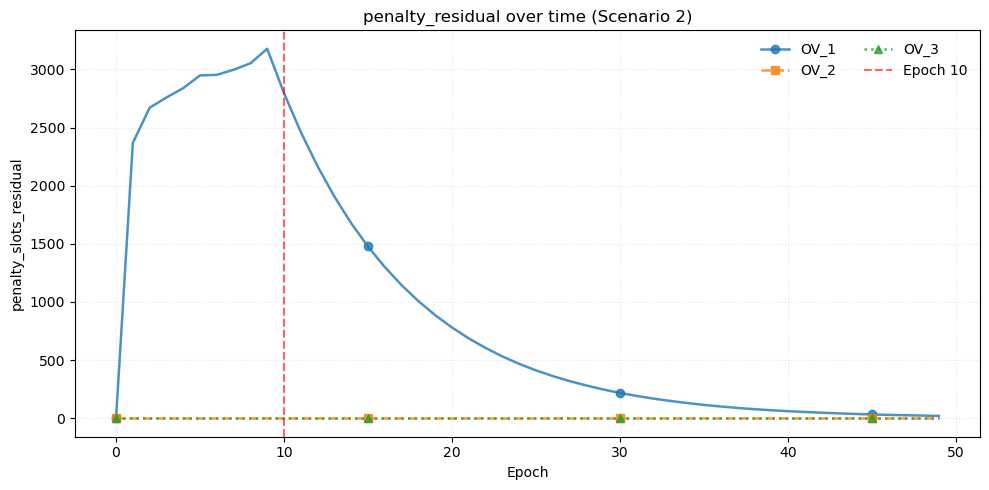

In [28]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df2.columns:
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df2[df2["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Linea verticale a epoch 50 (riferimento redenzione)
    plt.axvline(vline_epoch, linestyle="--", color="red", alpha=0.6, label="Epoch 10")

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen2_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()

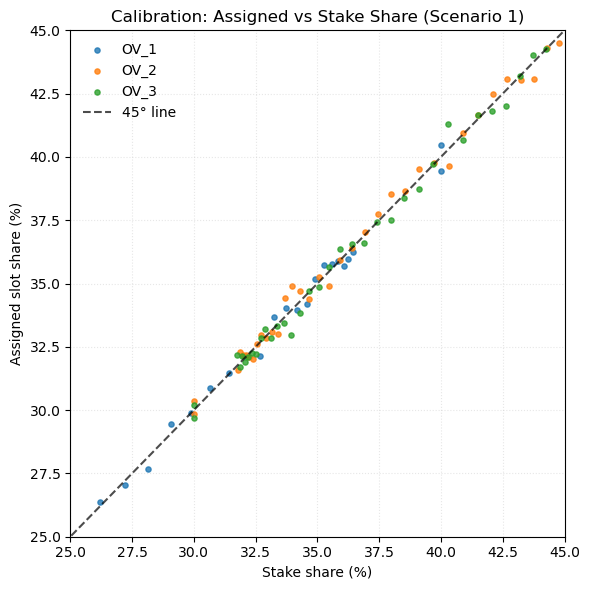

In [29]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df2["node"].unique():
    sub = df2[df2["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen2_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

# New stuff

In [48]:
df1.head()

,epoch,node,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.0,0.0,0.0,189.40,0.0,0.0,1.000000,1,0.394583
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.0,0.0,0.0,145.70,0.0,0.0,1.000000,1,0.303542
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.0,0.0,0.0,144.90,0.0,0.0,1.000000,1,0.301875
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,0,0.0,0.0,0.0,194.24,0.0,0.0,0.995572,1,0.404667
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,0,0.0,0.0,0.0,143.20,0.0,0.0,1.000000,1,0.298333


In [31]:
df2.head()

,epoch,node,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,bad_slots_pct_node,effective_stake,stake_share_pct,effective_stake_next,stake_share_next_pct,delivered_slots_share_pct,coinbase_epoch_tkg,fees_epoch_tkr_at_main,reward_epoch_total_value_tkg_only,coinbase_cum_tkg,fees_cum_tkr_at_main,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,0.00,400.0000,40.0000,400.947000,39.9987,39.4583,0.9470,0.0000,0.9470,0.9470,0.0000,0,0.000,0,0,0.0,0.00,0.0,473.50,0.0,0.00,1.000000,2,0.394583,1,0,0,0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,0.00,300.0000,30.0000,300.728500,30.0008,30.3542,0.7285,0.0000,0.7285,0.7285,0.0000,0,0.000,0,0,0.0,0.00,0.0,364.25,0.0,0.00,1.000000,2,0.303542,0,0,0,0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,0.00,300.0000,30.0000,300.724500,30.0004,30.1875,0.7245,0.0000,0.7245,0.7245,0.0000,0,0.000,0,0,0.0,0.00,0.0,362.25,0.0,0.00,1.000000,2,0.301875,0,0,0,0
3,1,OV_1,MAIN_1,9712,40.467,7577,0,2135,0,2135,21.98,400.9470,39.9987,49.568694,7.5973,31.5708,0.7577,0.0828,0.7577,1.7047,0.0828,2368,7.104,2637,2135,100.0,2367.76,0.0,485.60,0.0,2367.76,0.780169,2,0.404667,1,0,0,0
4,1,OV_2,MAIN_2,7160,29.833,7132,27,1,0,28,0.39,300.7285,30.0008,301.441700,46.2017,29.7167,0.7132,0.0899,0.7132,1.4417,0.0899,0,0.000,0,0,0.0,0.00,0.0,358.00,0.0,0.00,0.996089,2,0.298333,0,0,0,0


In [45]:
df2["post_t"] = df2["epoch"].apply(lambda x:1 if x > 9 else 0)
df2["interaction"] = df2["malicious_i"] * df2["post_t"]
df2["time_since_switch"] = df2["epoch"].apply(lambda x: max(0, x - 9))
df2.head()

,epoch,node,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,bad_slots_pct_node,effective_stake,stake_share_pct,effective_stake_next,stake_share_next_pct,delivered_slots_share_pct,coinbase_epoch_tkg,fees_epoch_tkr_at_main,reward_epoch_total_value_tkg_only,coinbase_cum_tkg,fees_cum_tkr_at_main,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,0.00,400.0000,40.0000,400.947000,39.9987,39.4583,0.9470,0.0000,0.9470,0.9470,0.0000,0,0.000,0,0,0.0,0.00,0.0,473.50,0.0,0.00,1.000000,2,0.394583,1,0,0,0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,0.00,300.0000,30.0000,300.728500,30.0008,30.3542,0.7285,0.0000,0.7285,0.7285,0.0000,0,0.000,0,0,0.0,0.00,0.0,364.25,0.0,0.00,1.000000,2,0.303542,0,0,0,0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,0.00,300.0000,30.0000,300.724500,30.0004,30.1875,0.7245,0.0000,0.7245,0.7245,0.0000,0,0.000,0,0,0.0,0.00,0.0,362.25,0.0,0.00,1.000000,2,0.301875,0,0,0,0
3,1,OV_1,MAIN_1,9712,40.467,7577,0,2135,0,2135,21.98,400.9470,39.9987,49.568694,7.5973,31.5708,0.7577,0.0828,0.7577,1.7047,0.0828,2368,7.104,2637,2135,100.0,2367.76,0.0,485.60,0.0,2367.76,0.780169,2,0.404667,1,0,0,0
4,1,OV_2,MAIN_2,7160,29.833,7132,27,1,0,28,0.39,300.7285,30.0008,301.441700,46.2017,29.7167,0.7132,0.0899,0.7132,1.4417,0.0899,0,0.000,0,0,0.0,0.00,0.0,358.00,0.0,0.00,0.996089,2,0.298333,0,0,0,0


In [49]:
df1.to_csv("dataset/scenario1.csv", index = False)
df2.to_csv("dataset/scenario2.csv", index = False)